<a href="https://colab.research.google.com/github/PabloCGarcia/deepLearning/blob/main/Clase02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
device_name = tf.test.gpu_device_name()
print("tarjeta grafica:", device_name)

tarjeta grafica: /device:GPU:0


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
batch_size = 128 
num_classes = 10 
epochs = 20
img_rows, img_cols = 28, 28

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adadelta",
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 13s 6ms/step - loss: 2.2750 - accuracy: 0.1666 - val_loss: 2.2357 - val_accuracy: 0.4071
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2105 - accuracy: 0.2996 - val_loss: 2.1570 - val_accuracy: 0.5772
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1289 - accuracy: 0.4006 - val_loss: 2.0525 - val_accuracy: 0.6486
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 2.0198 - accuracy: 0.4757 - val_loss: 1.9111 - val_accuracy: 0.6977
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 1.8740 - accuracy: 0.5337 - val_loss: 1.7289 - val_accuracy: 0.7345
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 1.7030 - accuracy: 0.5718 - val_loss: 1.5179 - val_accuracy: 0.7594
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 1.5232 - accuracy: 0.6039 - val_loss: 1.3078 - val_accuracy: 0.780

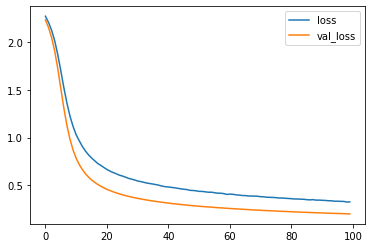

In [16]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();

In [17]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.1966831088066101
Test accuracy: 0.9412000179290771
